In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from settings import BASE_DIR

/home/paridhi/AARC/Projects/carla_simulations


In [3]:


def load_data(file_path: str) -> pd.DataFrame:
    """
    Load data from a CSV file into a pandas DataFrame.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        pd.DataFrame: The loaded data as a DataFrame.
    """
    full_path = f"{BASE_DIR}/{file_path}"
    df = pd.read_csv(full_path)
    return df

In [51]:
# load recorded data
data = load_data("Reports/sim_data_g2a26cb25_fs_FS_nV_5.csv")
print(data.head(25))

     time        name            x         y         z      speed  \
0   0.100      leader  9500.000000 -1.500000  0.482611   0.552493   
1   0.100  follower_0  9508.000000 -1.500000  0.484870   0.512433   
2   0.100  follower_1  9516.000000 -1.500000  0.486124   0.488442   
3   0.100  follower_2  9524.000000 -1.500000  0.487947   0.451859   
4   0.100  follower_3  9532.000000 -1.500000  0.499156   0.114080   
5   0.100  follower_4  9540.000000 -1.500000  0.499386   0.094345   
6   0.100  follower_5  9548.000000 -1.500000  0.499589   0.073238   
7   0.200      leader  9499.999023 -1.500484  0.482494   0.411626   
8   0.200  follower_0  9507.949219 -1.500344  0.484752  14.577566   
9   0.200  follower_1  9515.949219 -1.500363  0.486007  14.575566   
10  0.200  follower_2  9523.949219 -1.500362  0.487830  14.572511   
11  0.200  follower_3  9531.949219 -1.500362  0.499039  14.553528   
12  0.200  follower_4  9539.949219 -1.500362  0.499269  14.553135   
13  0.200  follower_5  9547.949219

In [52]:
# get speed between 50 to 80 seconds and print time and speed columns
speed_50_80 = data[(data['time'] >= 58) & (data['time'] <= 80)][['name','time', 'speed','acc']]
print(speed_50_80.head(50))

            name    time      speed          acc
4578      leader  58.021   0.034676     0.000000
4579  follower_0  58.021   0.034676   336.240753
4580  follower_1  58.021   1.450857  -409.916351
4581  follower_2  58.021   0.034676  4158.497559
4582  follower_3  58.021  14.702914 -4155.247559
4583  follower_4  58.021   0.034676  4154.125000
4584  follower_5  58.021  14.731872 -4163.431641
4585      leader  58.101   0.034988     0.000000
4586  follower_0  58.101   1.075273  -301.019867
4587  follower_1  58.101   0.034988   406.262665
4588  follower_2  58.101  14.714614 -4121.487305
4589  follower_3  58.101   0.034988  4118.210938
4590  follower_4  58.101  14.699153 -4117.156738
4591  follower_5  58.101   0.034988  4126.321777
4592      leader  58.201   0.043756     0.000000
4593  follower_0  58.201   0.043756   240.699020
4594  follower_1  58.201   1.322858  -296.115417
4595  follower_2  58.201   0.043756  3295.589844
4596  follower_3  58.201  14.703077 -3293.000732
4597  follower_4  58

In [53]:
# check if any record in gap column is  zero
zero_gap_records = data[data['gap'] == 0]
print(f"Number of records with zero gap: {len(zero_gap_records)}")

Number of records with zero gap: 0


In [54]:
# minimum gap value
min_gap = data['gap'].min()
print(f"Minimum gap value: {min_gap}")

Minimum gap value: 5.198361873626709


In [55]:
# maximum gap value
max_gap = data['gap'].max()
print(f"Maximum gap value: {max_gap}")

Maximum gap value: 621.166015625


In [56]:
# check when leader speed is zero, what are the gap values for the next 50 records
leader_zero_gap = data[data['speed'] == 0]['gap']
print(f"Gap values when leader speed is zero: {leader_zero_gap.tolist()}")

Gap values when leader speed is zero: []


In [57]:
# minimum speed value
min_speed = data['speed'].min()
print(f"Minimum speed value: {min_speed}")

Minimum speed value: 5.376551072373055e-05


In [58]:
# maximum speed value
max_speed = data['speed'].max()
print(f"Maximum speed value: {max_speed}")

Maximum speed value: 30.48143723963859


In [59]:


# get zero acceleration values of follower vehicle
zero_acceleration = data[data['speed'] == 0.0][['name','time', 'speed', 'acc', 'gap']]
print(f"Number of records with zero acceleration: {len(zero_acceleration)}")
print("Records with zero acceleration:")
zero_acceleration.head()

Number of records with zero acceleration: 0
Records with zero acceleration:


,name,time,speed,acc,gap


In [60]:
# minimum gap
min_acc = data[data['name']=='follower_5'][['gap']].min()
print(f"Minimum acceleration value: {min_acc}")

# # minimum gap
# min_gap_follower5 = data[data['name'] == 'follower_5'][['gap']].min()
# print(f"Minimum gap value for follower_5: {min_gap_follower5}")

Minimum acceleration value: gap    5.198362
dtype: float64


## Plot follower gaps

In [61]:
# plot follower_5 gap distribution for first nth records
# def plot_gap_distribution(data: pd.DataFrame,follower_name: str, n: int = None):
#     follower_gap_data = data[data['name'] == follower_name][['gap']]
#     if n:
#         follower_gap_data = follower_gap_data.iloc[:n]
#     plt.figure(figsize=(10, 6))
#     plt.plot(follower_gap_data['gap'], color='blue')
#     plt.title('Gap Distribution for Follower 5')
#     plt.xlabel('Gap (meters)')
#     plt.ylabel('Frequency')
#     plt.grid(True)
#     plt.show()

def plot_gap_over_time(data: pd.DataFrame, follower_name: str, n: int = None):
    follower_gap_data = data[data['name'] == follower_name][['time', 'gap']]
    if n:
        follower_gap_data = follower_gap_data.iloc[:n]
    plt.figure(figsize=(10, 6))
    plt.plot(follower_gap_data['time'], follower_gap_data['gap'], color='blue')
    plt.title(f'Gap Over Time for {follower_name}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Gap (meters)')
    plt.grid(True)
    plt.show()

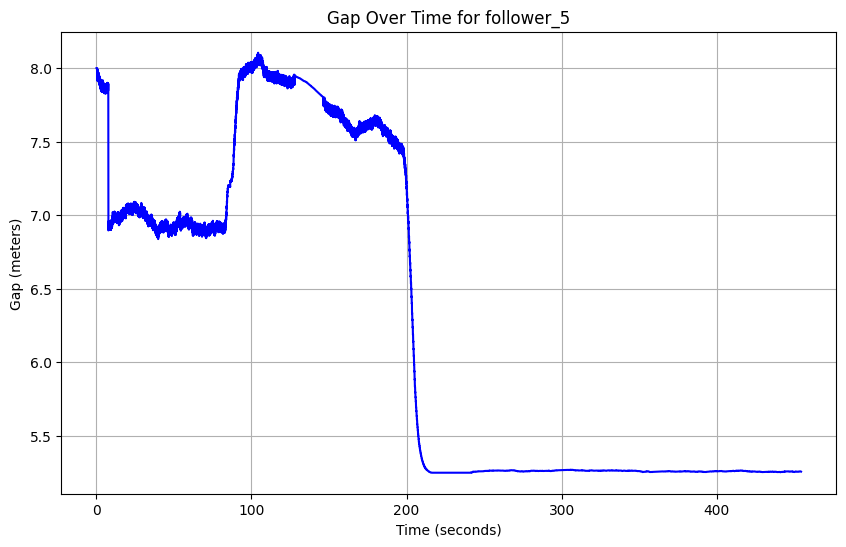

In [62]:
plot_gap_over_time(data, 'follower_5', n=5000)

# Plot command velocity vs gap distribution


In [63]:
def plot_command_velocity_and_gap(data: pd.DataFrame,max_points: int = 1000):

    data = data.head(max_points)  # Limit to max_points for clarity
    
    plt.figure(figsize=(12, 6))
    plt.plot(data['gap'], data['speed'], alpha=0.5)
    plt.title('Command Velocity vs Gap')
    plt.xlabel('Gap (m)')
    plt.ylabel('Command Velocity (m/s)')
    plt.grid(True)
    plt.xlim(0, data['gap'].max() + 5)
    plt.ylim(0, data['speed'].max() + 5)
    plt.show()

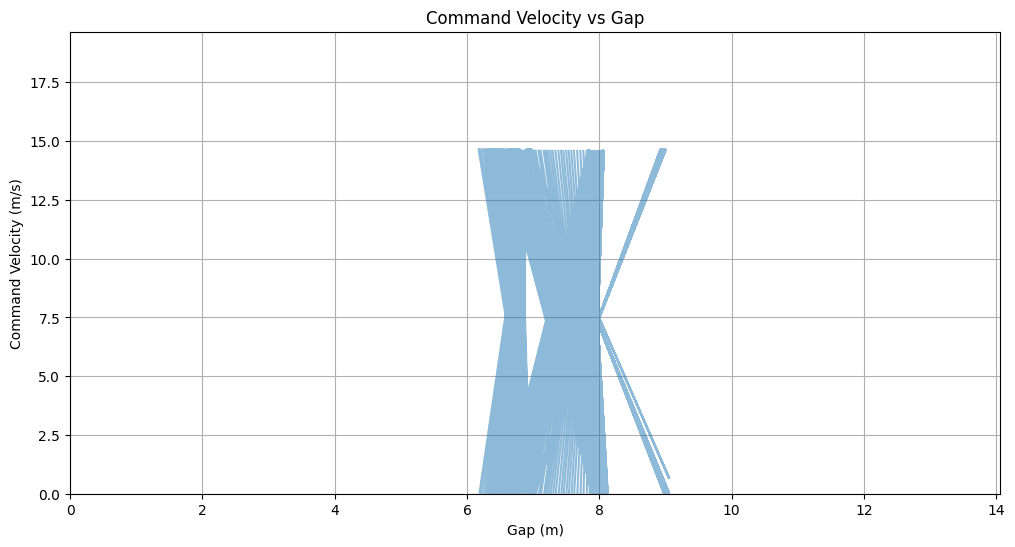

In [64]:
plot_command_velocity_and_gap(data,1100)

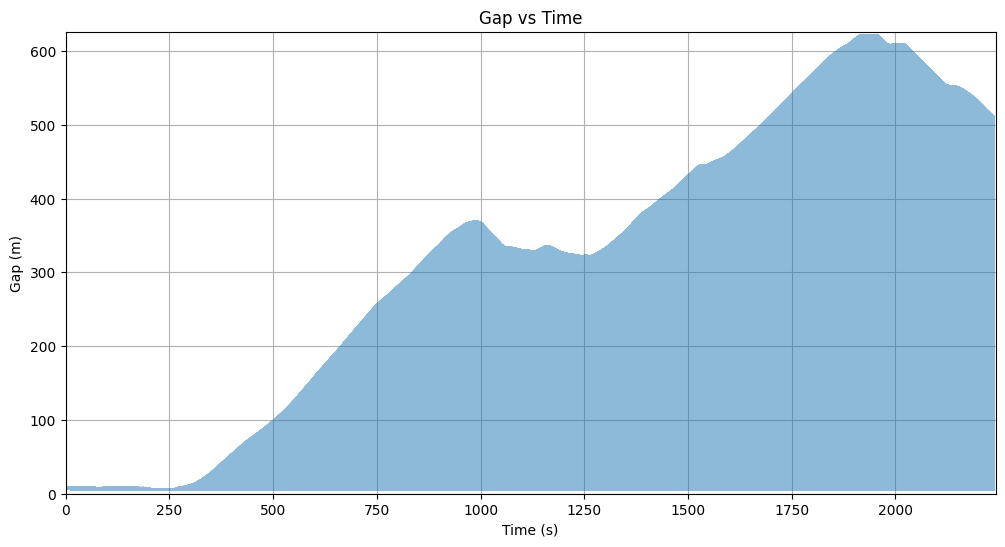

In [65]:
# plot gap vs time
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['gap'], alpha=0.5)
plt.title('Gap vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Gap (m)')
plt.grid(True)
plt.xlim(0, data['time'].max() + 5)
plt.ylim(0, data['gap'].max() + 5)
plt.show()

In [66]:
# Get the maximum speed value of follower vehicles only (excluding leader)
max_speed_follower = data[data['name'] != 'leader']['speed'].max()
min_speed_follower = data[data['name'] != 'leader']['speed'].min()

print(f"Maximum speed value of follower vehicle: {max_speed_follower:.3f} m/s")
print(f"Minimum speed value of follower vehicle: {min_speed_follower:.3f} m/s")


Maximum speed value of follower vehicle: 14.999 m/s
Minimum speed value of follower vehicle: 0.030 m/s


In [67]:
# Get the maximum speed value of follower vehicles only (excluding leader)
max_speed_leader = data[data['name'] == 'leader']['speed'].max()
min_speed_leader = data[data['name'] == 'leader']['speed'].min()

print(f"Maximum speed value of follower vehicle: {max_speed_leader:.3f} m/s")
print(f"Minimum speed value of leader vehicle: {min_speed_leader:.3f} m/s")

Maximum speed value of follower vehicle: 30.481 m/s
Minimum speed value of leader vehicle: 0.000 m/s


## Plot speed and time graph

In [68]:
def plot_speed(df,x_col,y_col,title, max_points: int = 1000,min_points: int = 0):
    df = df.iloc[min_points:max_points]  # Limit to max_points for clarity
    plt.figure(figsize=(12, 6))

    for label, group in df.groupby('name'):
        plt.plot(group[x_col], group[y_col], label=label,)
    
    
    # plt.plot(df[x_col], df[y_col], alpha=0.5)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.grid(True)
    plt.xlim(0, df[x_col].max() + 5)
    plt.ylim(0, df[y_col].max() + 5)
    plt.show()


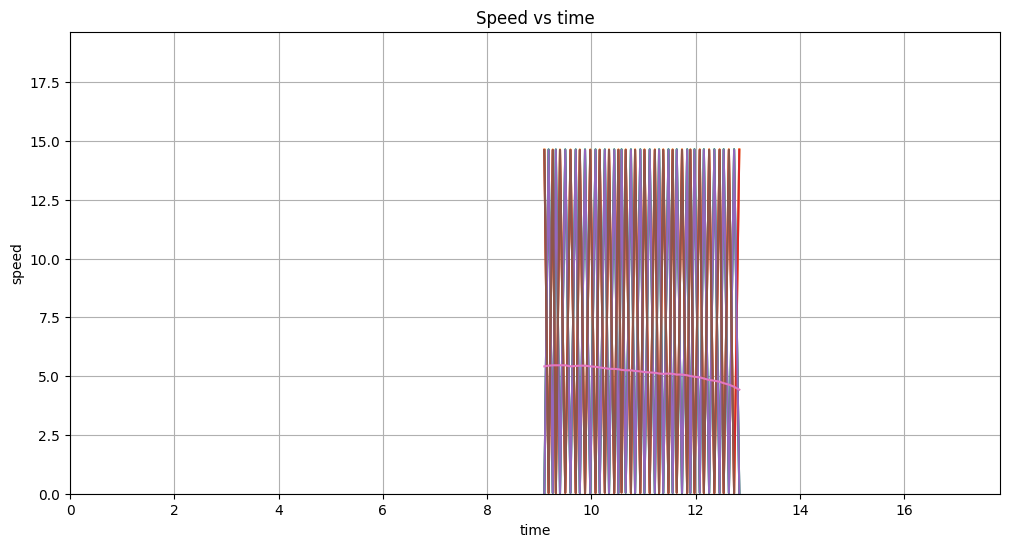

In [69]:
plot_speed(data,'time','speed','Speed vs time', max_points=1000,min_points=700)

In [70]:


def plot_follower_speed_profile(df, follower_name, max_points: int = None, min_points: int = 0):
    """
    Plots the speed profile for a specific follower vehicle.

    Args:
        df (pd.DataFrame): Data containing at least 'name', 'time', 'speed'.
        follower_name (str): Exact name of the follower to plot.
        max_points (int, optional): Max rows to plot. If None, plot all after min_points.
        min_points (int): Start plotting from this index.
    """
    follower_data = df[df['name'] == follower_name]
    if follower_data.empty:
        print(f"[Warning] No data found for follower: {follower_name}")
        return

    # Slice the data range
    if max_points is not None:
        follower_data = follower_data.iloc[min_points:max_points]
    else:
        follower_data = follower_data.iloc[min_points:]

    plt.figure(figsize=(10, 6))
    plt.plot(follower_data['time'], follower_data['speed'], label=follower_name)
    plt.xlabel('Time (s)')
    plt.ylabel('Speed (m/s)')
    plt.title(f'Speed Profile of {follower_name}')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


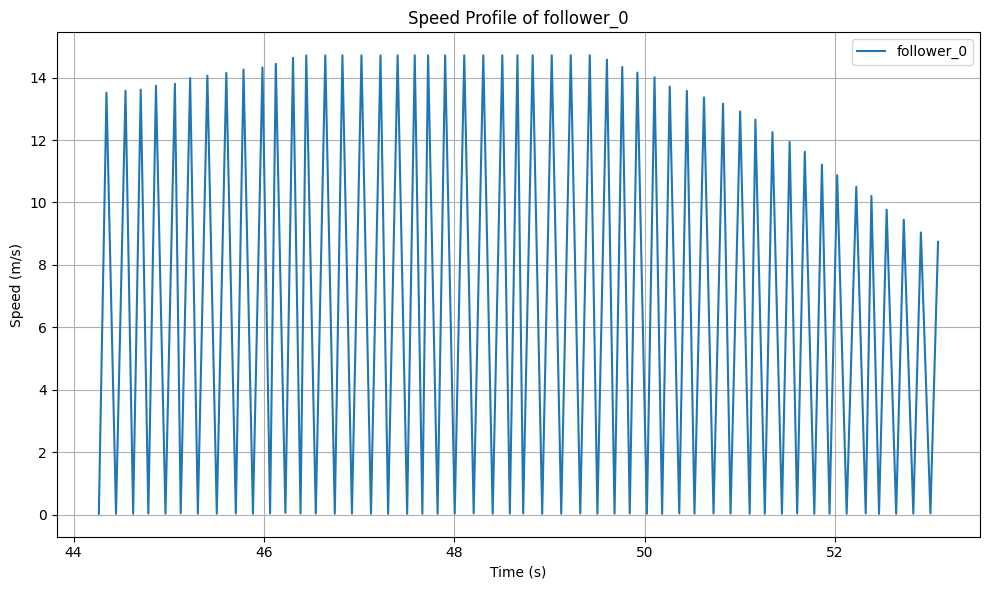

In [74]:
plot_follower_speed_profile(data, follower_name='follower_0', max_points=600,min_points=500)

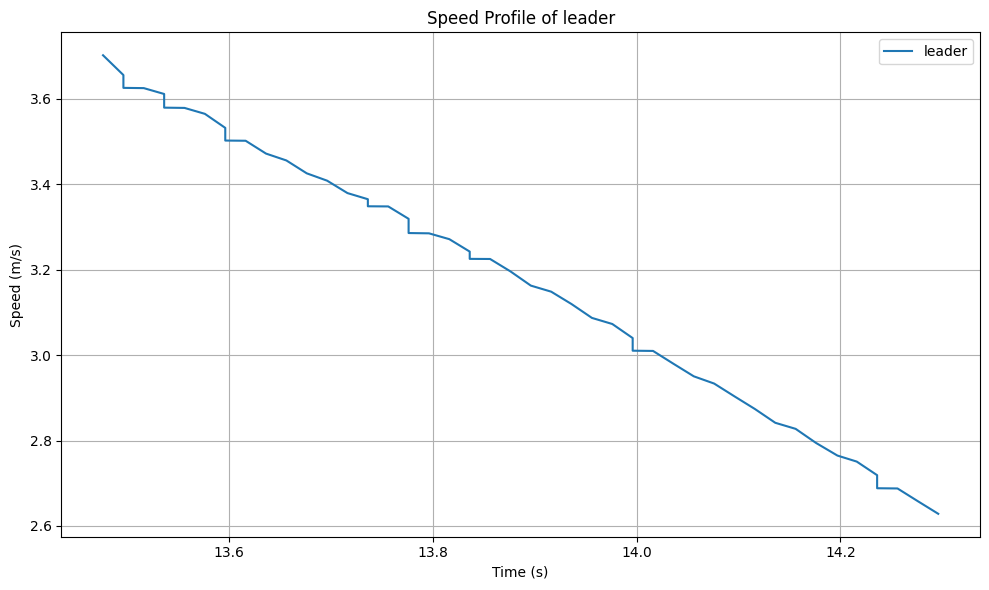

In [134]:
plot_follower_speed_profile(data, follower_name='leader', max_points=700,min_points=650)
